# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
sns.set()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [23]:
duplicate= merged_df[merged_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df  = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df= merged_df.drop_duplicates(subset='Mouse ID')
cleaned_df= merged_df[merged_df['Mouse ID'].isin(duplicate_mice_id)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

In [26]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_df=pd.DataFrame({'Mean Tumor Volume': mean,
                         'Median Tumor Volume': median,
                         'Tumor Volume Variance':var,
                         'Tumor Volume Std. Dev.':std,
                         'Tumor Volume Std. Err.':sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

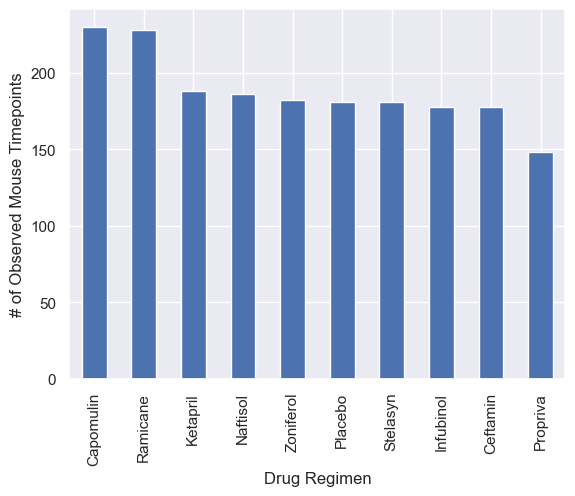

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_regimen=cleaned_df['Drug Regimen'].value_counts()
mice_per_regimen.plot.bar()
# Adding title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

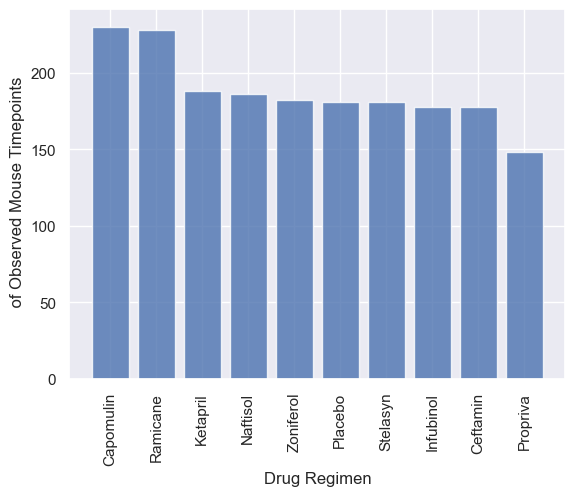

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_per_regimen.index.values, mice_per_regimen.values, alpha=0.8, align='center' )
plt.xlabel("Drug Regimen")
plt.ylabel(" of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

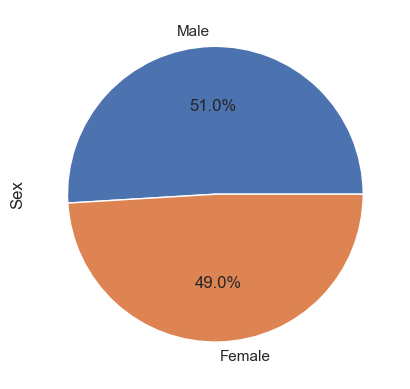

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=cleaned_df['Sex'].value_counts()
gender.plot(kind='pie', autopct= '%1.1f%%')
plt.ylabel('Sex')
plt.show()

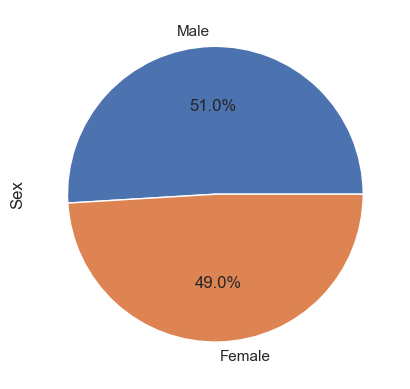

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender,labels=gender.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimen=cleaned_df.loc[(cleaned_df['Drug Regimen']=='Capomulin')|
                                (cleaned_df['Drug Regimen']=='Ramicane')|
                                 (cleaned_df['Drug Regimen']=='Infubinol')|
                                 (cleaned_df['Drug Regimen']=='Ceftamin'),: ]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df=selected_regimen.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, cleaned_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
tumor_volume_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=tumor_volume_df.iloc[i,:]["Drug Regimen"]
    Tum=tumor_volume_df.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"\n{Treatment}:")

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")

    #Printing any potential outliers
    for Tumor in Tumors[Num]:
        if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")


Capomulin:
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.


Ramicane:
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.


Infubinol:
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.4771

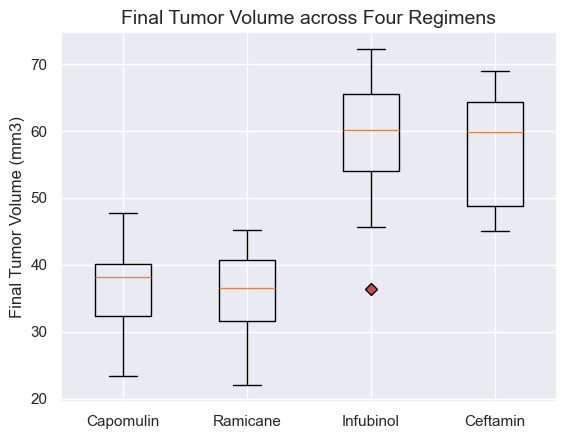

In [81]:
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(Tumors, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(Treatments)
plt.show()

## Line and Scatter Plots

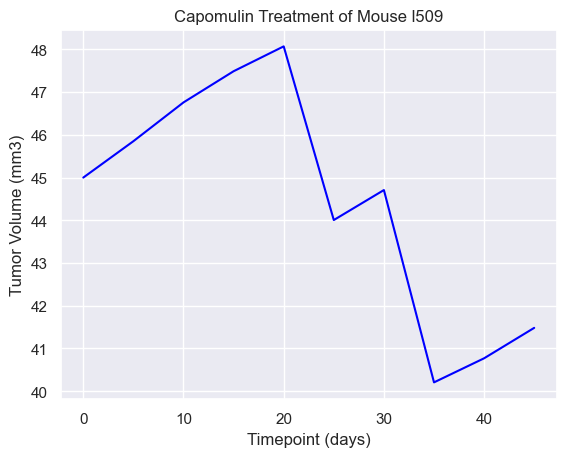

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_data=cleaned_df.loc[cleaned_df["Mouse ID"]=='l509',:]
plt.plot(l509_data["Timepoint"],l509_data["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


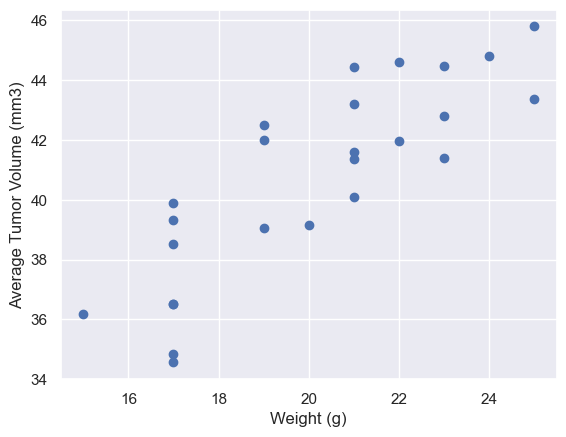

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capmulin_data= cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
avg_tumor_capomulin = capmulin_data["Tumor Volume (mm3)"].mean()
mouse_weight = capmulin_data["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


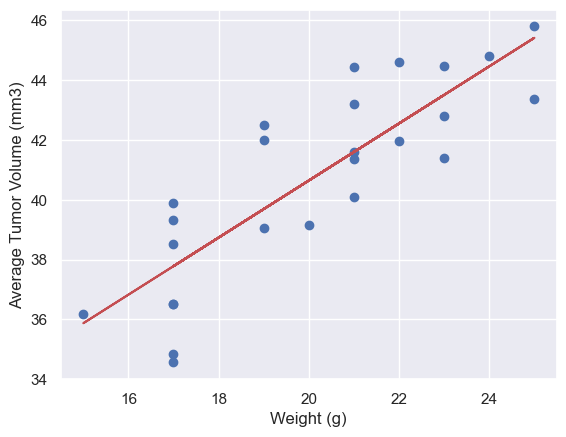

In [101]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
mouse_weight = mouse_weight.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()